In [1]:
# Copyright 2015 The TensorFlow Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the 'License');
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an 'AS IS' BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================
"""A simple MNIST classifier which displays summaries in TensorBoard.

This is an unimpressive MNIST model, but it is a good example of using
tf.name_scope to make a graph legible in the TensorBoard graph explorer, and of
naming summary tags so that they are grouped meaningfully in TensorBoard.

It demonstrates the functionality of every TensorBoard dashboard.
"""

'A simple MNIST classifier which displays summaries in TensorBoard.\n\nThis is an unimpressive MNIST model, but it is a good example of using\ntf.name_scope to make a graph legible in the TensorBoard graph explorer, and of\nnaming summary tags so that they are grouped meaningfully in TensorBoard.\n\nIt demonstrates the functionality of every TensorBoard dashboard.\n'

In [2]:
import os
# Using first CUDA device
os.environ["CUDA_VISIBLE_DEVICES"]="0"
# Disable GPU access
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: decodestring() is a deprecated alias, use decodebytes()
  import sys


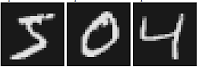

In [3]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from IPython.display import Image
import base64
Image(data=base64.decodestring("iVBORw0KGgoAAAANSUhEUgAAAMYAAABFCAYAAAARv5krAAAYl0lEQVR4Ae3dV4wc1bYG4D3YYJucc8455yCSSIYrBAi4EjriAZHECyAk3rAID1gCIXGRgIvASIQr8UTmgDA5imByPpicTcYGY+yrbx+tOUWpu2e6u7qnZ7qXVFPVVbv2Xutfce+q7hlasmTJktSAXrnn8vR/3/xXmnnadg1aTfxL3/7rwfSPmT+kf/7vf098YRtK+FnaZaf/SS++OjNNathufF9caiT2v/xxqbTGki/SXyM1nODXv/r8+7Tb+r+lnxZNcEFHEG/e3LnpoINXSh/PWzxCy/F9eWjOnDlLrr/++jR16tQakgylqdOWTZOGFqX5C/5IjXNLjdt7/NTvv/+eTjnllLT//vunr776Kl100UVpueWWq8n10lOmpSmTU5o/f0Fa3DDH1ry9p0/++eefaZ999slYYPS0005LK664Yk2eJ02ekqZNnZx+XzA/LfprYgGxePHitOqqq6YZM2akyfPmzUvXXXddHceoic2EOckxDj300CzPggUL0g033NC3OKy00krDer3pppv6FgcBIjvGUkv9u5paZZVVhoHpl4Mvv/wyhfxDQ0NZ7H7EQbacPHny39Tejzj88ccfacqUKRmHEecYf0Nr8GGAQJ8gMHCMPlH0QMzmEBg4RnN4DVr3CQIDx+gTRQ/EbA6BgWM0h9egdZ8g8PeliD4RutfF/Ouvfz9OtZy8aNGiNH/+/GGWl1122XzseYuVNKtqsaI23Ghw0DYCA8doG8JqO+AUG2+8cVq4cGHaY4890vLLL5/WXXfdfI6jvPDCC3lJ8amnnkoezP3000/pl19+GThHtWpIPekYomTxFS7HnkqKjMsss0yGgFE4r62tSBFVJ02aNPyconi9V4/JwzHwT9ZNNtkkeZ6w5ZZbph133DH99ttv6ccff8zXX3nllcRRnHNfv2cNGMQWGRaOrWbUrjsGBRLAA6U4Lhoqw9h2223ztRBq6aWXzsbgvueffz4Lu9NOO2UnYTgrr7xy7tO9nOH111/Pbb744ov0ww8/jAvngAdFMvQDDjggG/0GG2yQX1GZNm1aziCCwzrrrJPl3muvvXKwePnll9M333wzHDCKWPbLMbuAkfISjnvvvXcW/emnn85lqCBqa4a65hiYR/Gk2RNGRlwm3n7ggQfmdrKD9sqJtdZaKxvCnDlz8n3Tp09PXmPYeuutc0SVNQjvnmuvvTa3efzxx9N33303PGZ5rF75DBvvqq233nrp22+/TWeddVbyikpgxCE4vQDhlQUBRfDw2esbs2fPTquvvnqviNN1PuIdJ4GErVx44YUZowsuuCB9+umn6eeff84BspmsWqljhPFDxjGGYx/lDkN33udajCoVlAjRzl4U8LjefRwnPjsXG8OJqKBd8NB1LTU5IHyCd7LJGOYXNoGjFqaGIKtrERDIDKtukfGMH/zRZa1A101+YBF44KfMYzO8VOYYjDWiukiGqc022yyXOUqdzTffPJ/z1ialeqNVxA9gi0wzlOJ5juJlR8JeddVV+ZrIKTq4ZvJp/8EHH+SU+txzz+W2SqmxVFZRplrH5DTRXmGFFdKuu+6azjjjjOzosl5g6D54CQCI4mGjhNQO5occckh2LvLTA6fqJOEnyhU6kNlkZmUuvrtNcFx77bUzhsZWXgoSsm6t4Dsa/tp2DErCmA04HAI4FLjaaqtlBhmnSKiNY4rDtHZFB6jFMMH0RVDH+nCPYxtDCFJnKkniRbDitWjTK3sykQUuMLPn3DZGX8SFnCG/fVyz5zCCBtIHTLshdzif8fERn8cKXxjCNOwCTu3Qf6yqhV4AQokiP489//zzM0DxnQYKwqAtIkko1kQzFFxvaNcJ6u3Pe+65J/cRRvDee+9lA2BInIyRff/997nNO++8k7t0vl2A6vHWynmyiPJ43WKLLbIijz/++LTddtvlTCdzwIWSg9yjxBJ0GN/DDz+c7zv77LOzbEceeWSekwVGgsOsWbNyNo0+qt7DfPvtt8/dmtvIGnPnzk3PPPPMsJ6rHrNef/BBeJA90RprrJEDcNhctMkXR/mnbccwuCjNGTbaaKMc8TBZprITxOdgOvbuKxqGz6LSJ598kseJ9Gi1CYmSv/76a3YyJZWMZJ6Ceskp8EMusihFEAyUmVaa8G2rxTNHIrd733///eH7YeaLNe5xrEzlWNF/HqQDf0Tm+GIbvYdD43MsKAIo/JDgE0G5aFfN8NaWYxiUshikqGYTTUSt0TCkjXsYNqJQQso+rgGa0vX58ccf56hQTtk+48F92rmvlnE1A0on2uKP0Yrw+Nxzzz0zn+ZhjKwRXq6vueaa2TmUiRQfS7SyNeMks9IV9vrvJOl/q622yo4Mfw5Pvm6TMclLdit6shh+YAMnq1E29tEsteUYBgMSgxa5MOAzJZcVXQs4bUR8XxhCHIwzMALCBuCcx5q0tF3u133l8XrRMchFiRYNyMxBKM/5IjZlWVzjULKwACISytIWFsi56aab5mvOKyEikmdAO/iHY+BDCRUZuoPD1e1akECyLseA7d13352DhdKak8Cmlt3U7TSl9p58FwejYK8ncAwKpDTnGDcARbWiAUjHiNEHsITSPlagpEZChcfrZzwSOfBOiQwXLuR3PjAhtwAD08iAMCO/a+5xPTIm3ALjwERf0V+c69QeT7ZujVdLDhgKBrANXAMreMESRkU7rdVPrXNtZ4xIpSLH1VdfnR3j4IMPzkbw2Wefpa+//jovo5188slZsZjArAcvFP3YY4+lSy+9NEdTdTTy0I5xHHfccfm1CH2LtuORKEqmkwVlVU+sBY+IdJRmE0zeeOONnEXuu+++7AhnnnlmWn/99XMJ5brtzTffzHMJx/o555xzkgdb0U8rRtAKrnTYqtG1Ml6teyxInHDCCdlGYByBmG2Z97ChVvFo2zEwbHCRTbqP7EDxPjN2pUBEe86AXAcsg+f10TYMSTvnRM1ulQe1wG/nHEXZZEJZUIYQ5cgWMsEgMgqclFdkdh+MbFFyuddnWMLNfTYkcuuXHlBkpFYNI3dS+mMMfCHHsZWadfUjmQVn8iLywscG21apMscQwR555JEM3KuvvpoZ5LHOmzgjAvBwzFt2/Oijj3Lm4Ayin/MU/eGHH+b2N998c/5MGSaZ44nw7OEd5Rx77LE5+1EehYXxkpes5li2K6+8Mhv8Lrvsko381ltvzcEBfvHQKh5auk9GPvHEE3NJAx+/eKL/HXbYIQcbK3nwN067xAk4s5VHdbvsx0nxrYQeKxJMZAfBA7GlRx99NC9EtCN7JY4RoPBeAHIAyrB3jpHYwqu1d02d7HpZcfqINo5dL7eJMXtxTzk2sgWFM/gcsnCakI2cFOk+523O+Qw7WaeYHYpYRp9xn4BkbPdWSfgJXYYM+ne+2xRj2sdx8EDu8rm4Ntp9pY4RSmb0CIPOAVNGoLA47yU4S2xen37ppZdy9CkLE/3lm8bJHzJbbiavt2Q9p7AkK7oyXAZOLk7gs9c4PJC0AOE8DDyrgJkaWgYQkSPYuAdpWySfteU8HhqKouYq+io6ZfGeZo7xpbT1+jt+jGULfprpq922ePHMBibwjWVq523KVrzBsIzTaMeu1DFi0HI0YyyYtAekY5MltbRyihFJiROBKIYTwMCTWJNubwdQFCXFapK9z96mtbjgs3thFKWnUgjBzNZIya5FOyUcPG36q4LwRgZ6Ix8HtBk3tirGGU0feAkslHfk5PzBh2cXSkvtWqWOOEaRGcoSHdXDMoYn1tK8yaON0ahbCWgFS/vxSnjn5F4ItLeiFAGAzCKc7MDA1OlIjc4pLFKE7FEyxb5ZPNTbtuiv2fvrtddfOFsYXcwj8d8qv/XGq3femLvvvnvOvrIYPPEjG+PDseDbDnXcMXiyiGiyyACOPvrovN95552zV3/++ef5zVveznlEo6CICvG5l/d4JSvHP+qoo7JjKDs4PkVSGPm9HSz9W5rlPEoCQYHjVFXyRGnBOcKA28VOP/qTBWX6YnS2IKB8qYL/enyGHPbKziOOOCLj6sGeslGW8L6Y4ANr2MY99fpsdL7jjmFwkSTSr6gDVCk+tmDQedcJ5LgdwaLPbu7xjJRRNlErSsiQhVHJlOEQoh182o1wRTnharwYs3itnWP9Rd/RD5mLW5yveh/YRhYMjItyBh/wjPat8tEVx6B00RKo5513XpIl7rzzzuwEourMmTOz95uIcyBfTSXYiy++mCOrSFS1klsFrNZ9eGPoJtmeyRx00EE5cpGbIi21XnbZZbkMee2117KMHIKMIVcotVb/vXoOz6I0+URoMlVFcBFE7L1+IjNYIo6v/fo+D3tC+FCR+FHuwNUCgfOtUlccI5hnJMoIBhN1sBICqMoNNaLP3pkiFGciIIBC4HaEbRWk0dyHb3Mp/EY0I6+NsytvyKxsKhpQr8ozGpm1IZ8IbV+PyllGuyh1YBXXOQEcy6R8M5eAHzuxxX3GRvbaCKJ4aRfXrjkG5jEbk00Prxi8SZTJKmc5/PDDc5v99tsvC+hBjWtqStmD0F4Ma1foMvDtfqZMUc3/lYjMSFFW3NS7JtyyoKzSiTocHoFJHMc+MlK7Mta7n9NbATJerbEYvQWIWCVitIyaXrV3nsG7H2Y2GVcbxyj6NX+waKEPmOvbfShwtjhQDDz5Ygt/uuoY+OPtnICDEMBTWsAQUu0NBBsDEgFEWOADAiDaVRERWsCq5i34IRN+TbTJgn8KwzOFuR4KDUXW7Kyik53Ep8w/+RkxWeO5S1EM5wVABguXMGp69dk1x87D0ObdL32GHI5tsDQGHtwbm/Hw4TpnKvNY5Ge0x113DEwT3tIsIdSnDIfxcxJAevCHfE9cXcmotHXfAw88kIFUdgFjLMn4HuZRuh9FExmjRCCnZxRqcPxz8ioUVk9eRhJkPAYHV8ZVFRkjjFSfAtw222yTy2OZ0iv15fHcQ4dKaMcwsBdEEL26RzaIh5+yK7LSBGPno8yOZX+vzRhfXzZ8cRrtyzzkzpr803XHwB8wTJYIRol+VY8zqMMBbP0f+cExE1qTdbU7x3jwwQdzVBYdesExKNiEWx2MfwoOAyCbJ9uRHZvUTcPmsENhGNE4HBKOHKNqZzQu3KNfX9H1nRABQZlbNkpt4SNo4DWIIesDj9qYnwki2giWqol3330348kZLPm7xvi1Pffcc7MzhA3gy/0oeIuxWtmPiWNgNCIFYwcCAa2FA1ikJZz1aeUVsBmge9TyoqGoIqKUFdEKCFXcU0/pHJizVMUnXBiBh6IicdTTzsEOnuZkDE/2rcJI4KMf/TF+0TucwDhkZ+DGL4/nGkPGV/AIC+2RvfP6ZPTI4gu5XNM/Um7RPzuIFyn1zW7wpQ9UHj+fbOHPmDlGCOGBGIeQQfwuq0jnISBQfOHft7JEHN94Q5xF6XLFFVfkyKIEGyuiGAo3r6BIx0imcM6k+6GHHspOEQbcDq+UTl4BwRu7PstUiPEJFsa9/PLL83nXg6d2xnUvoxS5L7744uGyh/wyRpRF9YwSHsHjE088kWWADQeRFThZkTgBstensZG5h4m56oEdcAp9CwTOVUlj6hgECcGBpA6XDazeiLKhVABQAhKB3cNxbEAL4KoEppm+gjf3OMafDf+UW7zeTL/ltqIiAxBMOIIxnLOHgbFsMGQ4InhE0nJfrXw2hnIRD3SFBKmYWDfqE49woFvOzZno3NxM0HDciMjBDsjEBgLTsJHYN+qjmWtj7hjBLKFFQgL7qRz14jHHHJPBcC2M3wRPVDT5ohzZRv0Z16O/sdozAKmdopUH5kftTrzJpl+lk29CcgpLw3BgpMbwwqF/S80pGJ6xO0WM+8Ybbxw2TuOEoTYakwyovB/JKdzDMVQOHvCRzXju890fL11aGhcMqqIxdwwCRkYQDZAaE7lWBhyosQEmQM439MgffDHm0Si8EcuBC0ezcQSZVKYktzFEW+3sfQ4natRvu9eMTS9F7IvHo+m/2fb6LNuCc0WsW+mzHq9j6hgE9YCHp5tkez2EAVjlMOmyUlU2Lis8ygVR0rykyoltPZCaOY9fr32Qp50X6xi7pWCGbsHBvwLgGIcddljGxvcsjOU1GseyiKjJQWydpiqNsBlei85BfhNxeJunVCl31x0jBOMAjJ9jRC3OEERDS7QMI0qQohIYgLSq7FJuMZbi9WZA7kRbvFAWx5Dyy449mjEDG/dyDPW4VSiy2iNvBcCSUdxyyy35OYHrqJUx843j8I/qQpA074BVVdR1x+AIHCIiIGewsqIuds41tSSlOxeOFHuOQ/E+2zPEuFYVKM32U3RMvGy44YbZMTg2B2+GOIXXJcjpR9lkUy/QyZ7GUU8zAD9RCiuR0oQYVv1IMAk7qFL+rjkGg7GZQPLufffdN69QKJtkCAKKjNGu1p7gMgWDYEDRpkpAmu0rnMLehie/RavcI49Sr1ZW0w6V91ac/IsxmdHPB0U5pQ+4+TExDudNUhPufnaKIn7N6m2k9h11jKLRqP+UQJb2eHh4uYjK0LW1D0MpCq0NR4g24RTR/0hCdvM6/m14FtljeTL4D/liedFeO7LYcyh7eMGDY8X16IM8Vp9kWjj2GwWG5IZb2FKVOHTMMTCvDKBgD2Z22223bNynnnpqVrZXBFxjQDZUFJiwIqKHN8qHO+64IxvN/fffn9vG/VWC0UpfeC5uZMEbg/ctM/8SzYOxZ599Nhs4ebSx0ECpcDFvMCdRggkesoQ+zaHU0N4EgAEnue2227JTON+LgaEVDFu5h+w2Wdl33GFkEUIQqYIqdYwwbJGO8q2xOydqUiTFWpJVPzsuUwhlzzFETxlGdFSCqaMB4XwvUzgKWU3AyW4uwFns4QMbilUyxbq8p/4cw3UEB8FDGQUDx/acqB8zRS2dw5qthe3VatPKucocg6JiYu3lP2nfawvekKVITzgJQLH24QTBtPZeE2D89957b27jwZ1IwIm8R2OMWHmJ+3pxTzaK8l+HyMrgTzrppMxqOIEsGoZvz0nsyWiliRMUl2G9aOk6POyLZVUvYtBpniL4wA1m9lVSW46BOQqKpTLK9FnUsxftvW4swssa4dkhCGFCMNfcp08lhM9KKc4h0obgsa8ShHb6Cv5DJnu8IwHB9TB852DkOlzIRV6kXbSVMfQj48BWdhE0TLr1Fe3zQR/+gRMK5yjuq4KjZccQ2SlYjexHmCnSkiLjtsesmlnpQ5naFo1A5GMAHoJxBI709ttv54ygntZWmWEcQMS9VQleRT9kNmfAG0P3HRPGbHnVudg4gEyJOAYiE0wikHAAcxHyxndO4KI/WHEK/Qzo7wjAXfaFNdurikaNtIERRTqmYIYdE2tGEs8hfJ8iFB/3xV67MCjG8NZbb6Unn3wyC+XfDxfnDxFp496qhK6qn5CDA5twK/fIRH5Gb0MMOhxCFgkKjOBoHqKEkmWvueaanG04iTHcP3CKQO0/e3ZhgceP2smqcKyKRuUYlEKhPDL+d5z1c4qVFTDnmBIZMwZ9DiKAzTmvCetPNFR7W7fXXt/KLddqTcyjr17bRybkEF5XiQhPHnMuDlF07MCB3I49l4EDxTrnfsFBJBxQbQSKeGoROqjdurWzIzoGJqRxS2KUf/rpp2flcRDRjRKVCdpFhCwz7rOVKE5z++235/7uuuuuXDq5P5yKEY0np8B3TKb9K1/vLTF0/7MiJtyRPYrq4fx+7R2e7vFDDzDyfx1goPwcUGMEYG/rFI3oGAYW0UUyimQIcRwGzbgpVsZAUTYE065xCtc5GUeSHTyg4kzKs/FKoSBljyhvTz6y2gseZAwlwgI+cNBGtpV9ZRj4BobjFY9O8g0bQcXWaRpxBE5hHuFnJ0XB6dOn56ge2QGDlK2dFSSG4b8kxVzEdSWGVxgYQLzrxJkIGgbTaUE73b9MZ/KNfIMOJpdcckndYZWmFAwv+wgydW/o8wsCK3xnz56dFzx8oxPGtk7QiI5h0FBaeGzRKYIpjDN2ig6lB9OiprmI60qNieIMIXvsQy7yotjH9eI+2hbPDY4bI8D+2JdnWTYY+iwDs78qaUTHEM0sI1pClAVMnqX9ImGQszB6DHoNOLzZNZlGRlEq9JNB9JOsRXvoxDGnsDTudwFUHTNmzMjDqEaU9xYvGgWiZnka0TEo16CeNyCM1SLtwmt5cNEoCOUa5xjQAIFWEGBP5rbKdTRr1qwcfGUMthXVTCt917pnRMdwE6ZiQm0JckADBMYCgWLwtXjTSeq/d5Y7ieag7wmDwMAxJowqB4JUicDAMapEc9DXhEFgcjxcM7vvR4on7bHS1q84WNkpUr/iEL+aOLRw4cIlQCmuIhUBmsjHlpQ9c7EmzjEsN1vd6DeCg8UVT+qRd7b6EQey8wMT+6El8RSu36xhIO8AgQYI9F94bADG4NIAgUDg/wHX+3lgThDIegAAAABJRU5ErkJggg==".encode('utf-8')), embed=True)

In [4]:
import argparse
import os
import sys

import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

LOGDIR = "/tmp/model"
DATADIR = "/tmp/data"
LEARNING_RATE = 0.001
DROPOUT = 0.9
MAXSTEPS = 3000

In [5]:
# Clean model folder for demo
if tf.gfile.Exists(LOGDIR):
    tf.gfile.DeleteRecursively(LOGDIR)
tf.gfile.MakeDirs(LOGDIR)
# Remove existing tensorboard process 
!kill `ps -A | grep tensorboard | awk '{print $1}' | xargs`

In [6]:
def train():
  # Import data
  mnist = input_data.read_data_sets(DATADIR)

  sess = tf.InteractiveSession()
  # Create a multilayer model.

  # Input placeholders
  with tf.name_scope('input'):
    x = tf.placeholder(tf.float32, [None, 784], name='x-input')
    y_ = tf.placeholder(tf.int64, [None], name='y-input')

  with tf.name_scope('input_reshape'):
    image_shaped_input = tf.reshape(x, [-1, 28, 28, 1])
    tf.summary.image('input', image_shaped_input, 10)

  # We can't initialize these variables to 0 - the network will get stuck.
  def weight_variable(shape):
    """Create a weight variable with appropriate initialization."""
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

  def bias_variable(shape):
    """Create a bias variable with appropriate initialization."""
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

  def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
      mean = tf.reduce_mean(var)
      tf.summary.scalar('mean', mean)
      with tf.name_scope('stddev'):
        stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
      tf.summary.scalar('stddev', stddev)
      tf.summary.scalar('max', tf.reduce_max(var))
      tf.summary.scalar('min', tf.reduce_min(var))
      tf.summary.histogram('histogram', var)

  def nn_layer(input_tensor, input_dim, output_dim, layer_name, act=tf.nn.relu):
    """Reusable code for making a simple neural net layer.

    It does a matrix multiply, bias add, and then uses ReLU to nonlinearize.
    It also sets up name scoping so that the resultant graph is easy to read,
    and adds a number of summary ops.
    """
    # Adding a name scope ensures logical grouping of the layers in the graph.
    with tf.name_scope(layer_name):
      # This Variable will hold the state of the weights for the layer
      with tf.name_scope('weights'):
        weights = weight_variable([input_dim, output_dim])
        variable_summaries(weights)
      with tf.name_scope('biases'):
        biases = bias_variable([output_dim])
        variable_summaries(biases)
      with tf.name_scope('Wx_plus_b'):
        preactivate = tf.matmul(input_tensor, weights) + biases
        tf.summary.histogram('pre_activations', preactivate)
      activations = act(preactivate, name='activation')
      tf.summary.histogram('activations', activations)
      return activations

  hidden1 = nn_layer(x, 784, 500, 'layer1')

  with tf.name_scope('dropout'):
    keep_prob = tf.placeholder(tf.float32)
    tf.summary.scalar('dropout_keep_probability', keep_prob)
    dropped = tf.nn.dropout(hidden1, keep_prob)

  # Do not apply softmax activation yet, see below.
  y = nn_layer(dropped, 500, 10, 'layer2', act=tf.identity)

  with tf.name_scope('cross_entropy'):
    # The raw formulation of cross-entropy,
    #
    # tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.softmax(y)),
    #                               reduction_indices=[1]))
    #
    # can be numerically unstable.
    #
    # So here we use tf.losses.sparse_softmax_cross_entropy on the
    # raw logit outputs of the nn_layer above, and then average across
    # the batch.
    with tf.name_scope('total'):
      cross_entropy = tf.losses.sparse_softmax_cross_entropy(
          labels=y_, logits=y)
  tf.summary.scalar('cross_entropy', cross_entropy)

  with tf.name_scope('train'):
    train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(
        cross_entropy)

  with tf.name_scope('accuracy'):
    with tf.name_scope('correct_prediction'):
      correct_prediction = tf.equal(tf.argmax(y, 1), y_)
    with tf.name_scope('accuracy'):
      accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  tf.summary.scalar('accuracy', accuracy)

  # Merge all the summaries and write them out to
  # /tmp/tensorflow/mnist/logs/mnist_with_summaries (by default)
  merged = tf.summary.merge_all()
  train_writer = tf.summary.FileWriter(LOGDIR + '/train', sess.graph)
  test_writer = tf.summary.FileWriter(LOGDIR + '/test')
  tf.global_variables_initializer().run()

  # Train the model, and also write summaries.
  # Every 10th step, measure test-set accuracy, and write test summaries
  # All other steps, run train_step on training data, & add training summaries

  def feed_dict(train):
    """Make a TensorFlow feed_dict: maps data onto Tensor placeholders."""
    if train:
      xs, ys = mnist.train.next_batch(50, fake_data=False)
      k = DROPOUT
    else:
      xs, ys = mnist.test.images, mnist.test.labels
      k = 1.0
    return {x: xs, y_: ys, keep_prob: k}

  for i in range(MAXSTEPS):
    if i % 100 == 0:  # Record summaries and test-set accuracy
      summary, acc = sess.run([merged, accuracy], feed_dict=feed_dict(False))
      test_writer.add_summary(summary, i)
      print('Accuracy at step %s: %s' % (i, acc))
    else:  # Record train set summaries, and train
      if i % 200 == 0:  # Record execution stats
        run_options = tf.RunOptions(trace_level=tf.RunOptions.FULL_TRACE)
        run_metadata = tf.RunMetadata()
        summary, _ = sess.run([merged, train_step],
                              feed_dict=feed_dict(True),
                              options=run_options,
                              run_metadata=run_metadata)
        train_writer.add_run_metadata(run_metadata, 'step%03d' % i)
        train_writer.add_summary(summary, i)
        print('Adding run metadata for', i)
      else:  # Record a summary
        summary, _ = sess.run([merged, train_step], feed_dict=feed_dict(True))
        train_writer.add_summary(summary, i)
  train_writer.close()
  test_writer.close()

In [7]:
train()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Accuracy at step 0: 0.1026
Accuracy at step 100: 0.9108
Accuracy at step 200: 0.9288
Accuracy at step 300: 0.9373
Accuracy at step 400: 0.9351
Accuracy at step 500: 0.9505
Accuracy at step 600: 0.9511
Accuracy at step 700: 0.9563
Accuracy at step 800: 0.9614
Accuracy at step 900: 0.9599
Accuracy at step 1000: 0.9638
Accuracy at step 1100: 0.9651
Accuracy at step 1200: 0.9657
Accuracy at step 1300: 0.9694
Accuracy at step 1400: 0.9671
Accuracy at step 1500: 0.9706
Accuracy at step 1600: 0.9705
Accuracy at step 1700: 0.9721
Accuracy at step 1800: 0.9707
Accuracy at step 1900: 0.972
Accuracy at step 2000: 0.9692
Accuracy at step 2100: 0.9691
Accuracy at step 2200: 0.9747
Accuracy at step 2300: 0.975
Accuracy at step 2400: 0.9748
Accuracy at step 2500: 0.9772
Accuracy at step 2600: 0.9752
Accuracy at st